In [1]:
#Importing required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords

In [2]:
#Load the dataset

df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/-H0BcPr512mhbTDDfkcTJA/comments-with-emotions.csv')
df.sample(5)

,comment,like_count,published_at,author,sentiment,emotions,anger,fear,negative,positive,trust,anticipation,joy,surprise,sadness,disgust,positive_count
768,Pathetic. They even have to use 80s highlights...,1,2024-10-16T04:22:04Z,@henningts,Negative,"{'anger': 2, 'fear': 1, 'negative': 2, 'disgus...",2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
493,i think all bets are off Iron Mike Tyson gonna...,1,2024-10-18T10:12:25Z,@apacavelithadon96,Positive,"{'negative': 2, 'anger': 1, 'disgust': 1, 'fea...",1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
282,If someone doesn’t get seriously hurt it’s staged,0,2024-10-20T23:46:05Z,@chrisdagher5445,Negative,"{'anger': 1, 'fear': 1, 'negative': 1, 'sadnes...",1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
972,The circus is in town. Don´t think this will b...,6,2024-10-15T15:17:21Z,@fx850,Negative,"{'anger': 1, 'fear': 1, 'negative': 1}",1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
613,This fight not going to happen 😐,1,2024-10-17T00:51:00Z,@tcb7369,Neutral,"{'anger': 1, 'fear': 1, 'negative': 1, 'antici...",1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   comment         1156 non-null   object 
 1   like_count      1156 non-null   int64  
 2   published_at    1156 non-null   object 
 3   author          1156 non-null   object 
 4   sentiment       1156 non-null   object 
 5   emotions        1156 non-null   object 
 6   anger           1156 non-null   float64
 7   fear            1156 non-null   float64
 8   negative        1156 non-null   float64
 9   positive        1156 non-null   float64
 10  trust           1156 non-null   float64
 11  anticipation    1156 non-null   float64
 12  joy             1156 non-null   float64
 13  surprise        1156 non-null   float64
 14  sadness         1156 non-null   float64
 15  disgust         1156 non-null   float64
 16  positive_count  1156 non-null   int64  
dtypes: float64(10), int64(2), object(

In [4]:
#Data Preprocessing

# Step 1: Remove duplicates
df = df.drop_duplicates()

# Step 2: Remove rows with missing values
df = df.dropna()

# Step 3: Drop unnecessary columns
df = df.drop(columns=['published_at', 'author'])

df.head()

,comment,like_count,sentiment,emotions,anger,fear,negative,positive,trust,anticipation,joy,surprise,sadness,disgust,positive_count
0,If this fight were real and not just an exhibi...,0,Positive,"{'anger': 3, 'fear': 3, 'negative': 2, 'positi...",3.0,3.0,2.0,8.0,7.0,6.0,5.0,2.0,2.0,1.0,1
1,Tyson will bust his hide. People forget with h...,0,Neutral,"{'fear': 2, 'negative': 3, 'anticipation': 1, ...",1.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2,We signing the contract with this one 🗣🗣🗣🗣🔥🔥🔥🔥,0,Neutral,{},0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,Watching cm punk fight in the ufc is better th...,0,Positive,"{'anger': 2, 'fear': 1, 'negative': 1}",2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,Yall forget how much Ring IQ this guy has. AND...,0,Positive,"{'negative': 1, 'positive': 1, 'anticipation': 1}",0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1


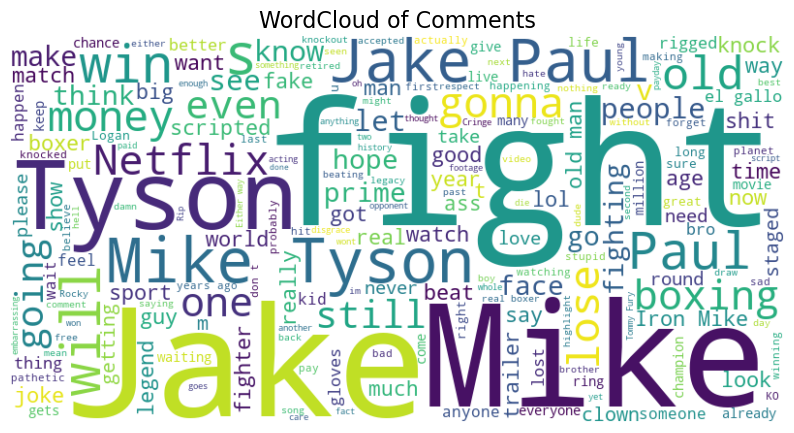

In [5]:
# WordCloud for 'comment' column

text = " ".join(comment for comment in df['comment'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


# Plot WordCloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Comments", fontsize=16)
plt.show()

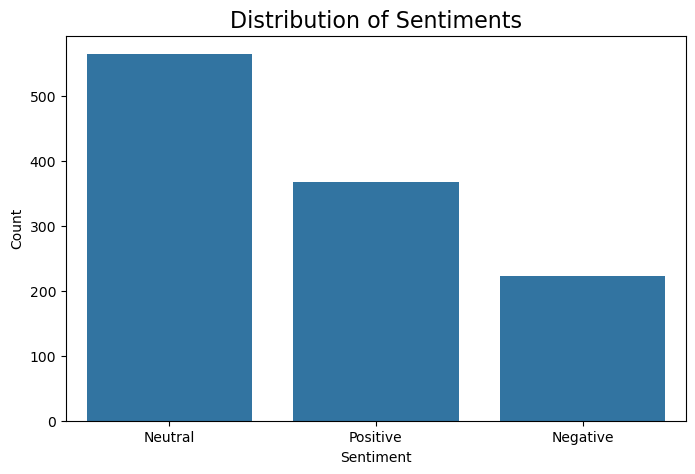

In [6]:
#Distribution of sentiments

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment', order=df['sentiment'].value_counts().index, legend=False)
plt.title("Distribution of Sentiments", fontsize=16)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

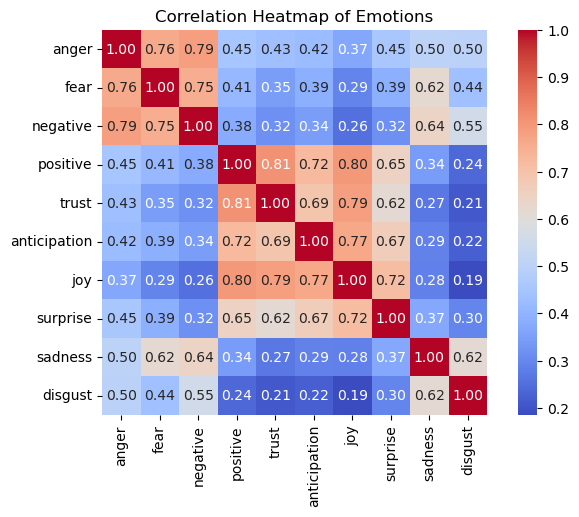

In [7]:
#Correlation heatmap for emotions

emotion_columns = ['anger', 'fear', 'negative', 'positive', 'trust',
                   'anticipation', 'joy', 'surprise', 'sadness', 'disgust']
correlation_matrix = df[emotion_columns].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Heatmap of Emotions", fontsize=12)
plt.show()

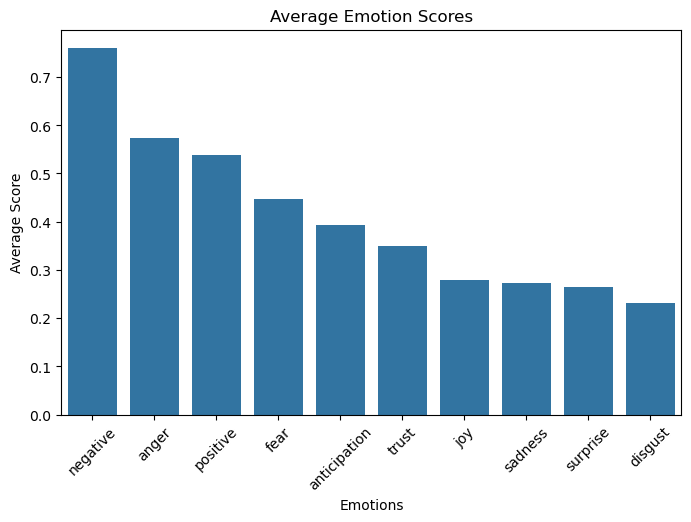

In [8]:
#Barplot of top emotions

mean_emotions = df[emotion_columns].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=mean_emotions.index, y=mean_emotions.values)
plt.title("Average Emotion Scores", fontsize=12)
plt.xlabel("Emotions")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.show()

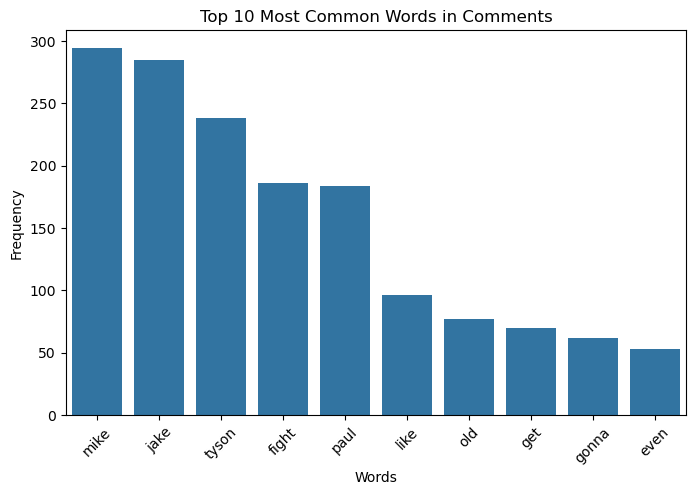

In [11]:
#Top 10 most common words in comments

all_words = " ".join(df['comment'].astype(str)).split()
filtered_words = [word.lower() for word in all_words if word.isalpha() and word.lower() not in stop_words]
word_counts = Counter(filtered_words)
most_common_words = word_counts.most_common(10)
words, counts = zip(*most_common_words)

plt.figure(figsize=(8, 5))
sns.barplot(x=list(words), y=list(counts))
plt.title("Top 10 Most Common Words in Comments", fontsize=12)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

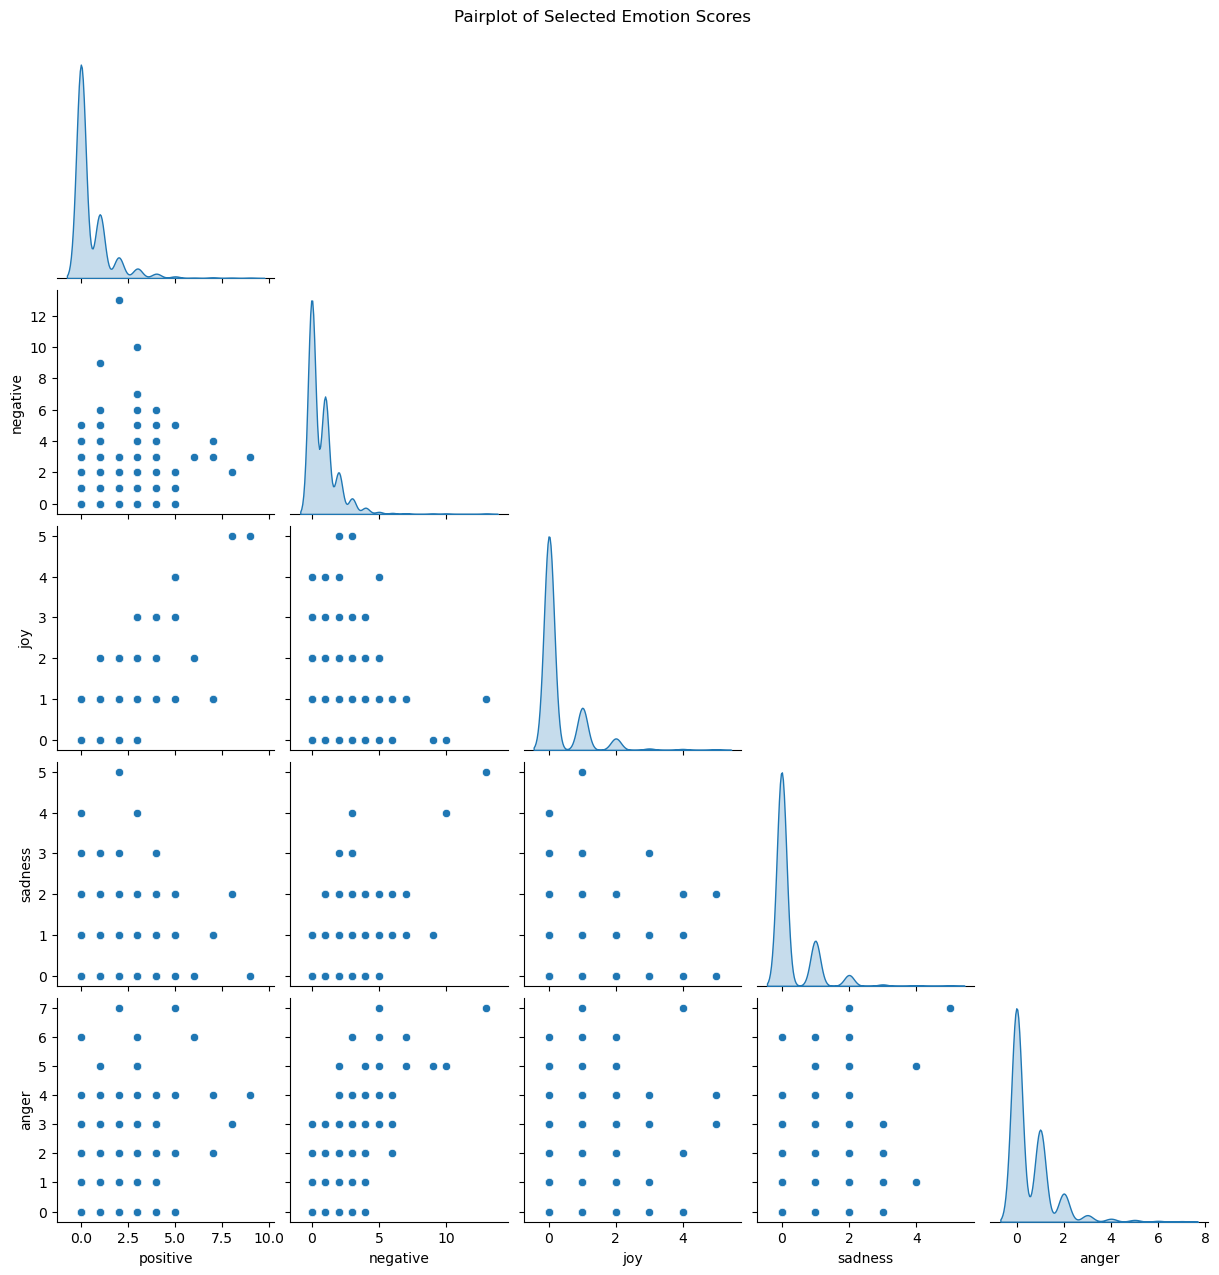

In [12]:
# Pairplot for selected emotion columns

selected_emotions = ['positive', 'negative', 'joy', 'sadness', 'anger']
sns.pairplot(df[selected_emotions], diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Selected Emotion Scores", y=1.02, fontsize=12)
plt.show()

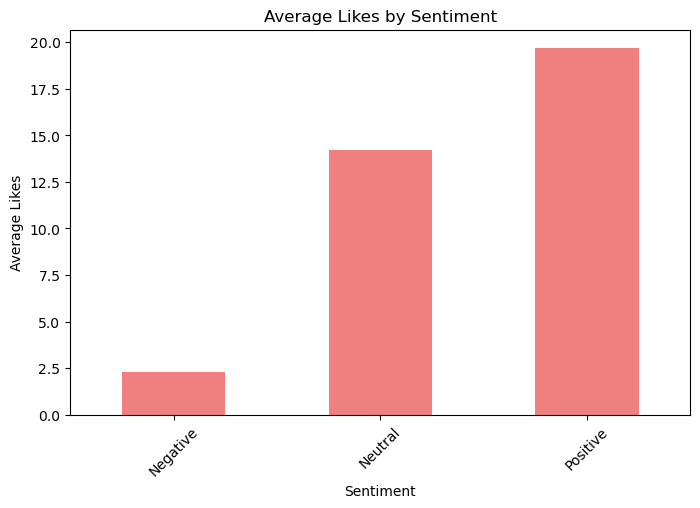

In [14]:
# Average likes by sentiment

avg_likes = df.groupby('sentiment')['like_count'].mean()
plt.figure(figsize=(8, 5))
avg_likes.plot(kind='bar', color='lightcoral')
plt.title("Average Likes by Sentiment", fontsize=12)
plt.xlabel("Sentiment")
plt.ylabel("Average Likes")
plt.xticks(rotation=45)
plt.show()

In [15]:
#Top 5 Positive Emotion comments

pd.set_option('display.max_colwidth', None)

# Comments with highest positive emotion scores
top_positive_comments = df.sort_values(by='positive', ascending=False).head(5)

# Correct syntax to print specific columns
print(top_positive_comments[['comment', 'positive']])

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        comment  \
57                                                        I think you past your prime and are foolish enough to think the internet cares about your extremist mindset on a boxing match forgetting that the entertainment world is all about entertainment and engagement. You do the engaging and we will watch it for the entertainment . Tysons a full grown man who makes his own

In [16]:
#Top 5 Negative Emotion comments

top_positive_comments = df.sort_values(by='negative', ascending=False).head(5)

# Correct syntax to print specific columns
print(top_positive_comments[['comment', 'negative']])

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  comment  \
280  Mr Tyson  no disrespect bro , please , PLEASE withdraw from this fight with the young hungry heavyweight prospect & future Undisputed World Champion ,"The 1:24  Problem Child" Jake Paul (10-1- 0  7 KO) ,  1st dan black belt Uechi Ryu Karate Do  🥋🇯🇵  .\n\nOnce again Mr Tyson , please PLEASE withdraw from this dangerous fight as you will be hurt & we fear for your health & safety .\n\n\nFriend of Grandmaster Steven Segal Sensei : 11th dan black belt 🥋 